<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load the data</a></span></li><li><span><a href="#Define-X-and-y" data-toc-modified-id="Define-X-and-y-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Define X and y</a></span></li><li><span><a href="#Visualize-the-data" data-toc-modified-id="Visualize-the-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Visualize the data</a></span></li><li><span><a href="#Anomay-detection" data-toc-modified-id="Anomay-detection-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Anomay detection</a></span></li><li><span><a href="#PCA" data-toc-modified-id="PCA-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>PCA</a></span></li><li><span><a href="#Train-and-test-split" data-toc-modified-id="Train-and-test-split-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Train and test split</a></span></li><li><span><a href="#Confusion-matrix" data-toc-modified-id="Confusion-matrix-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Confusion matrix</a></span></li><li><span><a href="#Tuning-hyperparameter" data-toc-modified-id="Tuning-hyperparameter-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Tuning hyperparameter</a></span></li></ul></div>

## Load the data

In [1]:
import pandas as pd 
import numpy as np 
data = pd.read_csv('data_class_raw.csv')
data.head()

,x1,x2,y
0,0.77,3.97,0
1,1.71,2.81,0
2,2.18,1.31,0
3,3.80,0.69,0
4,5.21,1.14,0


## Define X and y

In [16]:
X = data.drop(['y'], axis=1)
y = data['y']
X.shape, y.shape

((36, 2), (36,))

## Visualize the data

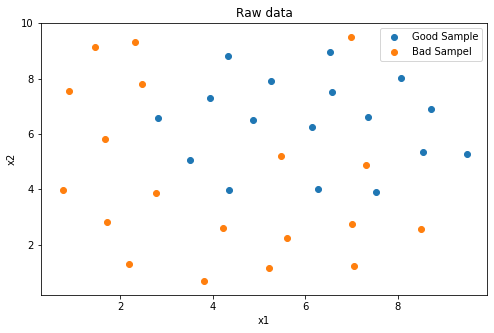

In [20]:
%matplotlib inline 
from matplotlib import pyplot as plt
fig1 = plt.figure(figsize=(8,5))
good = plt.scatter(X.x1[y==1], X.x2[y==1])
bad = plt.scatter(X.x1[y==0], X.x2[y==0])

plt.title('Raw data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend((good,bad),('Good Sample','Bad Sampel'))
plt.show()

## Anomay detection

In [33]:
from sklearn.covariance import EllipticEnvelope
ad_model = EllipticEnvelope(contamination=0.01)
ad_model.fit(X[y==0])
y_bad_anomaly = ad_model.predict(X[y==0])


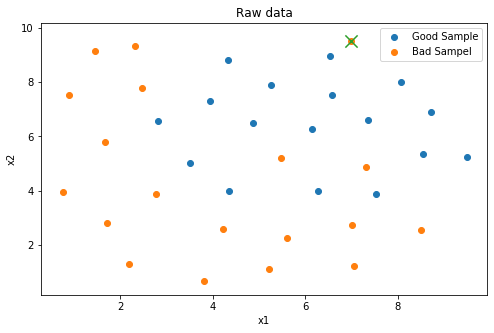

In [34]:
fig2 = plt.figure(figsize=(8,5))
good = plt.scatter(X.x1[y==1], X.x2[y==1])
bad = plt.scatter(X.x1[y==0], X.x2[y==0])
plt.scatter(X.x1[y==0][y_bad_anomaly==-1],X.x2[y==0][y_bad_anomaly==-1], marker='x',s=150)

plt.title('Raw data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend((good,bad),('Good Sample','Bad Sampel'))
plt.show()

## PCA 

In [36]:
data = pd.read_csv('data_class_processed.csv')
data.head()

,x1,x2,y
0,0.77,3.97,0
1,1.71,2.81,0
2,2.18,1.31,0
3,3.80,0.69,0
4,5.21,1.14,0


In [37]:
#define X and y
X = data.drop(['y'],axis=1)
y = data.loc[:,'y']

[0.5369408 0.4630592]


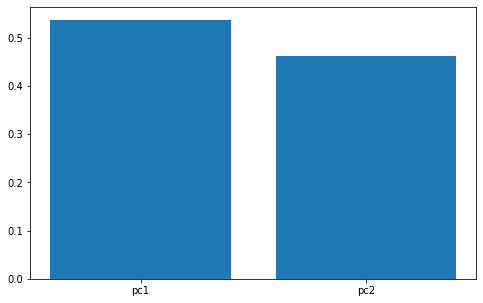

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
X_norm = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_norm)
var_ratio = pca.explained_variance_ratio_
print(var_ratio)

fig3 = plt.figure(figsize=(8,5)) 
plt.bar(['pc1','pc2'],var_ratio)
plt.show()


## Train and test split

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, random_state=4, test_size = .4)
X_train.shape, X_test.shape, X.shape

((21, 2), (14, 2), (35, 2))

In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn_10 = KNeighborsClassifier(n_neighbors=10)
knn_10.fit(X_train,y_train)

y_train_predicted = knn_10.predict(X_train)
y_test_predicted = knn_10.predict(X_test)

from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, y_train_predicted)
test_accuracy = accuracy_score(y_test, y_test_predicted)

print('training accuracy :', train_accuracy)
print('testing accuracy :', test_accuracy)

training accuracy : 0.9047619047619048
testing accuracy : 0.6428571428571429


In [51]:
#visualize the knn result and boundary
xx, yy = np.meshgrid(np.arange(0,10,0.05),np.arange(0,10,0.05))
print(yy.shape)

(200, 200)


In [52]:
x_range = np.c_[xx.ravel(),yy.ravel()]
print(x_range.shape)

(40000, 2)


In [53]:
y_range_predict = knn_10.predict(x_range)

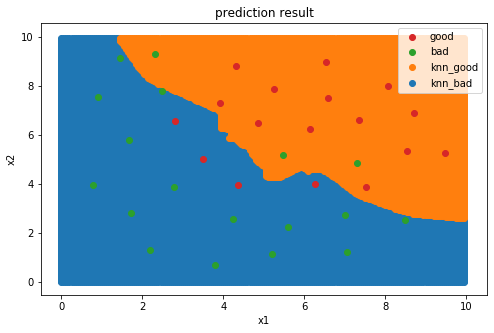

In [58]:
fig4 = plt.figure(figsize=(8,5))
knn_bad = plt.scatter(x_range[:,0][y_range_predict==0],x_range[:,1][y_range_predict==0])
knn_good = plt.scatter(x_range[:,0][y_range_predict==1],x_range[:,1][y_range_predict==1])

bad = plt.scatter(X.loc[:,'x1'][y==0],X.loc[:,'x2'][y==0])
good = plt.scatter(X.loc[:,'x1'][y==1],X.loc[:,'x2'][y==1])
plt.legend((good,bad,knn_good,knn_bad),('good','bad','knn_good','knn_bad'))
plt.title('prediction result')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

## Confusion matrix

In [61]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_test_predicted)
print(cm)
print(classification_report(y_test, y_test_predicted))

[[4 2]
 [3 5]]
              precision    recall  f1-score   support

           0       0.57      0.67      0.62         6
           1       0.71      0.62      0.67         8

    accuracy                           0.64        14
   macro avg       0.64      0.65      0.64        14
weighted avg       0.65      0.64      0.64        14



![confusion_matrix](images/06_confusion_matrix.png)

In [63]:
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
print(TP, TN, FP, FN)

5 4 2 3


**准确率:** 整体样本中，预测正确样本数的比例
- Accuracy = (TP + TN)/(TP + TN + FP + FN)

In [64]:
accuracy = (TP + TN)/(TP + TN + FP + FN)
print(accuracy)

0.6428571428571429


**灵敏度（召回率）:** 实际为正样本中，预测正确的比例
- Sensitivity = Recall = TP/(TP + FN)

In [66]:
recall = TP/(TP + FN)
print(recall)

0.625


**特异度:** 实际为负样本中，预测正确的比例
- Specificity = TN/(TN + FP)

In [67]:
specificity = TN/(TN + FP)
print(specificity)

0.6666666666666666


**精确率:** 预测结果为正的样本中，预测正确的比例
- Precision = TP/(TP + FP)

In [68]:
precision = TP/(TP + FP)
print(precision)

0.7142857142857143


**F1分数:** 综合Precision和Recall的一个判断指标
- F1 Score = 2*Precision X Recall/(Precision + Recall)

In [69]:
f1 = 2*precision*recall/(precision+recall)
print(f1)

0.6666666666666666


## Tuning hyperparameter

In [74]:
n = [i for i in range(1, 21)]
accuracy_train = []
accuracy_test = []
for i in n:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_train_predicted_i = knn.predict(X_train)
    y_test_predicted_i = knn.predict(X_test)
    accuracy_train_i = accuracy_score(y_train, y_train_predicted_i)
    accuracy_test_i = accuracy_score(y_test, y_test_predicted_i)
    accuracy_train.append(accuracy_train_i)
    accuracy_test.append(accuracy_test_i)


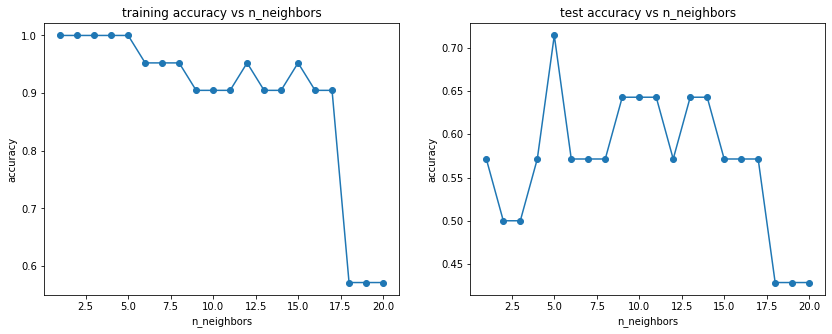

In [80]:
fig5 = plt.figure(figsize=(14,5))
plt.subplot(121)
plt.plot(n,accuracy_train,marker='o')
plt.title('training accuracy vs n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')

plt.subplot(122)
plt.plot(n,accuracy_test,marker='o')
plt.title('test accuracy vs n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')

plt.show()